In [83]:
import scipy
from scipy import interpolate
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [126]:
a = 0.5
b = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0, t_f = 0, 25

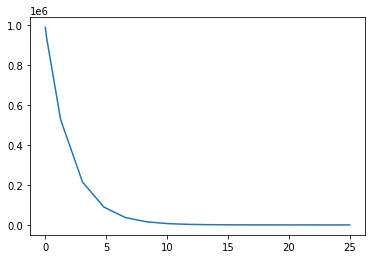

In [193]:
def dsdt(t,S):
    return (- a * S)

suscept = integrate.solve_ivp (dsdt, (t_0, t_f), [S])
plt.plot(suscept.t, suscept.y[0])
plt.show()

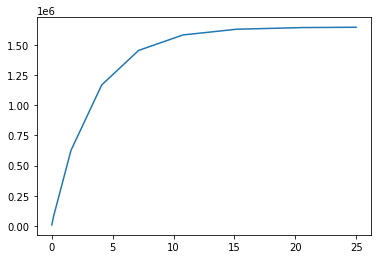

In [197]:
def didt(t,I):
    return (a * S - b * I)

infect = integrate.solve_ivp (didt, (t_0, t_f), [I] )
plt.plot(infect.t, infect.y[0])
plt.show()

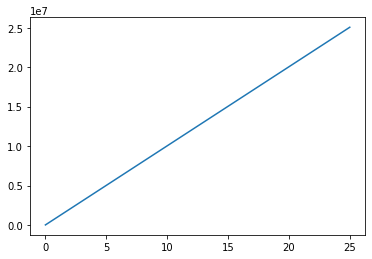

In [238]:
def drdt(t,R):
    return (N + b * I)

recov = integrate.solve_ivp(drdt, (t_0, t_f), [I])
plt.plot(recov.t, recov.y[0])
plt.show()

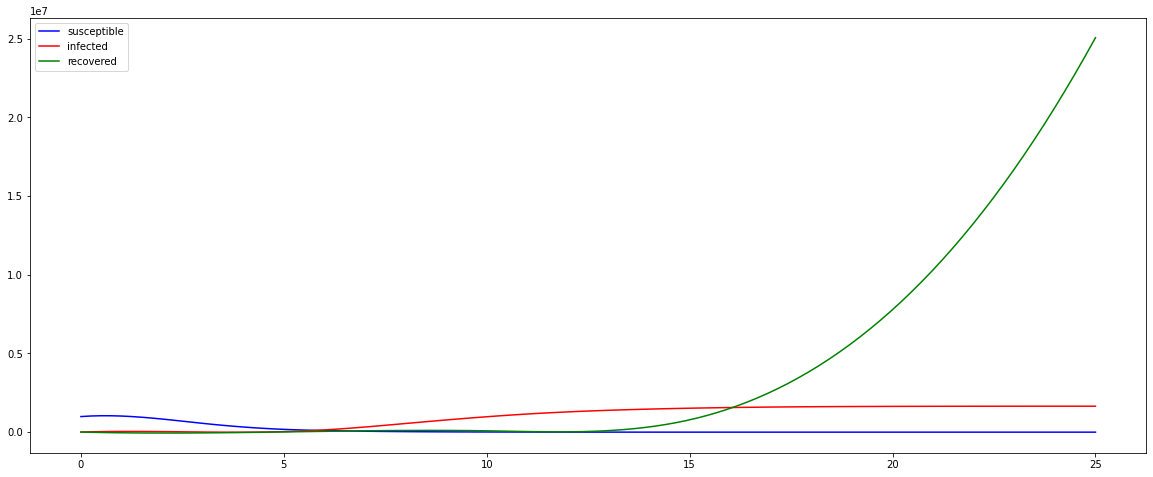

In [248]:
fig, axs = plt.subplots(figsize=(20,8))
time1 = np.linspace(0, 25, len(suscept.y[0]))
time2 = np.linspace(0, 25, len(infect.y[0]))
time3 = np.linspace(0, 25, len(recov.y[0]))
f1 = interpolate.interp1d(time1, suscept.y[0], kind='cubic')
f2 = interpolate.interp1d(time2, infect.y[0], kind='cubic')
f3 = interpolate.interp1d(time3, recov.y[0], kind='cubic')
more_time = np.linspace(t_0, t_f, 100)
plt.plot(more_time, f1(more_time), color='b', label='susceptible')
plt.plot(more_time, f2(more_time), color='r', label='infected')
plt.plot(more_time, f3(more_time), color='g', label='recovered')

plt.legend()
plt.show()